**Imports**

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**ploting**

In [ ]:
path = '/content/drive/MyDrive/DATA/asl_dataset' 

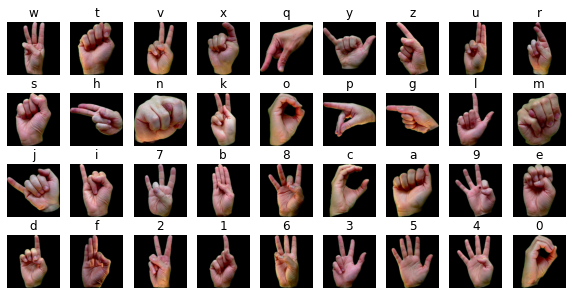

In [ ]:
fig, ax = plt.subplots(4, 9, figsize=(10, 5))

img_classes = [os.path.join(path, im) for im in os.listdir(path)]

ax = ax.flatten()

for i, img_class in enumerate(img_classes):
    img = os.listdir(img_class)[np.random.randint(0, 10)]
    img_path = os.path.join(img_class, img)
    image = cv2.imread(img_path)
    ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[i].set_title(os.path.basename(img_class))
    ax[i].axis('off')

plt.show()

path extraction

In [ ]:
import os
import pandas as pd

# set the directory path where your images are stored
dir_path = '/content/drive/MyDrive/DATA/asl_dataset'

# create an empty list to store the image file paths and names
image_list = []

# loop through the subdirectories in the directory path
for subdir in os.listdir(dir_path):
    subdir_path = os.path.join(dir_path, subdir)
    # check if the subdirectory is a directory and not a file
    if os.path.isdir(subdir_path):
        # loop through the image files in the subdirectory
        for file_name in os.listdir(subdir_path):
          # create a dictionary with the file path and name
          image_dict = {'folder': subdir,
                        'path': os.path.join(subdir_path, file_name),
                        'filename': file_name
                        }
                # append the dictionary to the list
          image_list.append(image_dict)

# create a Pandas DataFrame from the list of dictionaries
image_df = pd.DataFrame(image_list)

# print the DataFrame
image_df


,folder,path,filename
0,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...,hand1_w_left_seg_5_cropped.jpeg
1,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...,hand5_w_dif_seg_4_cropped.jpeg
2,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...,hand1_w_bot_seg_4_cropped.jpeg
3,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...,hand1_w_bot_seg_3_cropped.jpeg
4,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...,hand1_w_dif_seg_5_cropped.jpeg
...,...,...,...
2510,0,/content/drive/MyDrive/DATA/asl_dataset/0/hand...,hand5_0_bot_seg_5_cropped.jpeg
2511,0,/content/drive/MyDrive/DATA/asl_dataset/0/hand...,hand5_0_dif_seg_5_cropped.jpeg
2512,0,/content/drive/MyDrive/DATA/asl_dataset/0/hand...,hand5_0_dif_seg_4_cropped.jpeg
2513,0,/content/drive/MyDrive/DATA/asl_dataset/0/hand...,hand5_0_dif_seg_3_cropped.jpeg


In [ ]:
image_df['path'][0]

'/content/drive/MyDrive/DATA/asl_dataset/w/hand1_w_left_seg_5_cropped.jpeg'

In [ ]:
image_df=image_df.drop(['filename'],axis=1)
image_df.head()

,folder,path
0,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...
1,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...
2,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...
3,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...
4,w,/content/drive/MyDrive/DATA/asl_dataset/w/hand...


plot with extracted path

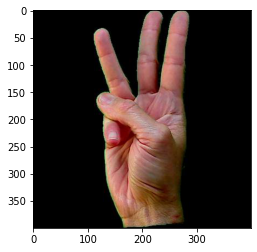

In [ ]:
img_1  = plt.imread(image_df['path'][0])
plt.imshow(img_1)


In [ ]:
img_1.shape

(400, 400, 3)

x, y split

In [ ]:
x = []
y = []

for img, target in zip(image_df.path, image_df.folder):
  x.append(cv2.imread(img))
  y.append(target)

In [ ]:
plt.imshow(x[0])

label encoding

In [ ]:
 from sklearn.model_selection import train_test_split
 encoder = LabelEncoder()
 y_encoded = encoder.fit_transform(y)
 y_encoded

train , test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.3, random_state=12)

In [ ]:
img_size=x[0].shape
img_size

reshaping and resizeing

In [ ]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train = x_train.reshape(-1, img_size[0], img_size[1], img_size[2])
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size[0], img_size[1], img_size[2])
y_test = np.array(y_test)

layers

In [ ]:
# model = Sequential()
# model.add(Conv2D(32,5,padding='same',activation='relu', input_shape=(img_size[0], img_size[1], img_size[2])))
# model.add(MaxPool2D())

# model.add(Conv2D(32, 3, padding="same", activation="relu"))
# model.add(MaxPool2D())

# model.add(Conv2D(64, 3, padding="same", activation="relu"))
# model.add(MaxPool2D())
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(128,activation="relu"))
# model.add(Dense(5, activation="softmax"))

In [ ]:

model = Sequential()
#convolutional layer 1
model.add(Conv2D(filters=128,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(img_size[0], img_size[1], img_size[2])))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

#convolutional layer 2
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))


#convolutional layer 3
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))
model.add(BatchNormalization())


#convolutional layer 4
model.add(Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'))
model.add(BatchNormalization())


#convolutional layer 5
model.add(Conv2D(filters=256,kernel_size=(1,1),strides=(1,1),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

#flattern layer
model.add(Flatten())

#FCL 1
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

#FCL 1
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

#FCL 2
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))

#FCL 3
model.add(Dense(36,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 10, batch_size=100, validation_data = (x_test, y_test))

In [ ]:
hist=model.history.history

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist['loss'], label='Traning loss')
plt.plot(hist['val_loss'], label='Validation_loss')
plt.legend()
plt.xlabel('no of epochs')
plt.ylabel('loss')

In [ ]:
plt.plot(hist['accuracy'], label='accuracy')
plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('no of epochs')
plt.ylabel('loss')

In [ ]:
model.predict(x_test[0].reshape(-1,400,400,3))

In [ ]:
np.argmax(model.predict(x_test[0].reshape(-1,400,400,3)))

**saving the model**

In [ ]:
model.save('my_model.h5')


**Recalling the model**

In [ ]:
# Define the path to the saved model file
model_path = '/content/drive/MyDrive/Colab Notebooks/main project/model76.h5'

# Try to load the model
try:
    model = tf.keras.models.load_model(model_path)
except OSError as e:
    print(f"Unable to open file {model_path}: {e}")
    # Handle the error as needed, such as falling back to a default model or exiting the program


In [ ]:
from google.colab.patches import cv2_imshow
def pred_1(index):
  plt.imshow(x_test[index])
  c=np.argmax(model.predict(x_test[index].reshape(-1,400,400,3)))
  print('the predicted sign is ', + c)
  print('the orginal sign is,{}'.format( y_test[index]) )


In [ ]:
pred_1(1)

**zip file**

In [ ]:
import zipfile

model_path = 'models/my_model.h5'
if not os.path.exists(os.path.dirname(model_path)):
    os.makedirs(os.path.dirname(model_path))
model.save(model_path)

# Create a zip file containing the saved model
with zipfile.ZipFile('models/my_model.zip', 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_path, os.path.basename(model_path))

In [ ]:
import zipfile
import tensorflow as tf
import numpy as np

# Load the model from the zip file
with zipfile.ZipFile('models/my_model.zip', 'r') as zipf:
    zipf.extractall('models')
model_path = 'models/my_model.h5'
model = tf.keras.models.load_model(model_path)

# Make predictions with the loaded model
predictions = model.predict(np.array([[1,2,3,4,5]]))
print(predictions)
